In [1]:
import numpy as np
from numpy import ma
import math
import scipy
import os
from IPython.display import Image
from tqdm import tqdm

from netCDF4 import Dataset

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker

# from matplotlib.mlab import bivariate_normal

NA = 6.022e+23

In [2]:
FILEDIR = '/n/home12/hongwei/HONGWEI/GC_run_13.0/Final_simulation_continuous_injection/gc_2x25_eulerian_final'
NcFile   = Dataset(FILEDIR+'/OutputDir/GEOSChem.SpeciesConc.20150101_0005z.nc4','r',format='NETCDF4_CLASSIC')

Ap = NcFile.variables['hyai']

del NcFile

In [3]:
# 0.5x0.625
FILEDIR1 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/Final_simulation_continuous_injection/gc_05x0625_eulerian_final'
NcFile1   = Dataset(FILEDIR1+'/OutputDir/GEOSChem.SpeciesConc.20150101_0005z.nc4','r',format='NETCDF4_CLASSIC')

lat1             = NcFile1.variables['lat'][:]
lon1             = NcFile1.variables['lon'][:]

# EU1              = NcFile1.variables['SpeciesConc_PASV_EU2']
EU11             = NcFile1.variables['SpeciesConc_PASV_EU']

GC_AREA1 = NcFile1.variables['AREA'][:,:]

# 1*1.25
FILEDIR2 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/Final_simulation_continuous_injection/gc_1x125_eulerian_final'
NcFile2   = Dataset(FILEDIR2+'/OutputDir/GEOSChem.SpeciesConc.20150101_0005z.nc4','r',format='NETCDF4_CLASSIC')


lat2             = NcFile2.variables['lat'][:]
lon2             = NcFile2.variables['lon'][:]

# EU2              = NcFile2.variables['SpeciesConc_PASV_EU2']
EU22             = NcFile2.variables['SpeciesConc_PASV_EU']

GC_AREA2 = NcFile2.variables['AREA'][:,:];

# 2*2.5
FILEDIR3 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/Final_simulation_continuous_injection/gc_2x25_eulerian_final'
NcFile3   = Dataset(FILEDIR3+'/OutputDir/GEOSChem.SpeciesConc.20150101_0005z.nc4','r',format='NETCDF4_CLASSIC')

lat3             = NcFile3.variables['lat'][:]
lon3             = NcFile3.variables['lon'][:]

# EU3              = NcFile3.variables['SpeciesConc_PASV_EU2']
EU33             = NcFile3.variables['SpeciesConc_PASV_EU']

GC_AREA3 = NcFile3.variables['AREA'][:,:];


# 4*5
FILEDIR4 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/Final_simulation_continuous_injection/gc_4x5_eulerian_final'
NcFile4   = Dataset(FILEDIR4+'/OutputDir/GEOSChem.SpeciesConc.20150101_0005z.nc4','r',format='NETCDF4_CLASSIC')

lat4             = NcFile4.variables['lat'][:]
lon4             = NcFile4.variables['lon'][:]
# EU4              = NcFile4.variables['SpeciesConc_PASV_EU2']
EU44             = NcFile4.variables['SpeciesConc_PASV_EU']

GC_AREA4 = NcFile4.variables['AREA'][:,:];


# lagrange: 2*2.5
FILEDIR0 = '/n/home12/hongwei/HONGWEI/GC_run_13.0/Final_simulation_continuous_injection/gc_2x25_lagrange_final_V30_Dis10'
NcFile0   = Dataset(FILEDIR0+'/OutputDir/GEOSChem.SpeciesConc.20150101_0005z.nc4','r',format='NETCDF4_CLASSIC')

lat0             = NcFile0.variables['lat'][:]
lon0             = NcFile0.variables['lon'][:]

# LA0              = NcFile0.variables['SpeciesConc_PASV_LA2'][:,:,:,:]
LA00              = NcFile0.variables['SpeciesConc_PASV_LA'][:,:,:,:]
LA03              = NcFile0.variables['SpeciesConc_PASV_LA3'][:,:,:,:]
LA00 = LA00 + LA03

GC_AREA0 = NcFile0.variables['AREA'][:,:];


In [4]:
NcFile0.variables['AREA']

<class 'netCDF4._netCDF4.Variable'>
float32 AREA(lat, lon)
    long_name: Surface area
    units: m2
unlimited dimensions: 
current shape = (91, 144)
filling off

In [5]:
Nx1 = len(EU11[0,0,0,:])
Ny1 = len(EU11[0,0,:,0])
Nz1 = len(EU11[0,:,0,0])
Nt1 = len(EU11[:,0,0,0])

Nx2 = len(EU22[0,0,0,:])
Ny2 = len(EU22[0,0,:,0])
Nz2 = len(EU22[0,:,0,0])
Nt2 = len(EU22[:,0,0,0])

Nx3 = len(EU33[0,0,0,:])
Ny3 = len(EU33[0,0,:,0])
Nz3 = len(EU33[0,:,0,0])
Nt3 = len(EU33[:,0,0,0])

Nx4 = len(EU44[0,0,0,:])
Ny4 = len(EU44[0,0,:,0])
Nz4 = len(EU44[0,:,0,0])
Nt4 = len(EU44[:,0,0,0])

Nx0 = len(LA00[0,0,0,:])
Ny0 = len(LA00[0,0,:,0])
Nz0 = len(LA00[0,:,0,0])
Nt0 = len(LA00[:,0,0,0])

EU22

<class 'netCDF4._netCDF4.Variable'>
float32 SpeciesConc_PASV_EU(time, lev, lat, lon)
    long_name: Dry mixing ratio of species PASV_EU
    units: mol mol-1 dry
    averaging_method: instantaneous
unlimited dimensions: time
current shape = (30, 72, 181, 288)
filling off

In [6]:
del NcFile0, NcFile1, NcFile2, NcFile3, NcFile4

In [7]:
#------------------------------------------------
# total air mass in each grid  ------------------
#------------------------------------------------

# 0.5x0.625
AD_file1 = Dataset(FILEDIR1+'/OutputDir/GEOSChem.StateMet.20150101_0005z.nc4','r',format='NETCDF4_CLASSIC')
GC_AD1   = AD_file1.variables['Met_AD']

# 1x1.25
AD_file2 = Dataset(FILEDIR2+'/OutputDir/GEOSChem.StateMet.20150101_0005z.nc4','r',format='NETCDF4_CLASSIC')
GC_AD2   = AD_file2.variables['Met_AD']

# 2x2.5
AD_file3 = Dataset(FILEDIR3+'/OutputDir/GEOSChem.StateMet.20150101_0005z.nc4','r',format='NETCDF4_CLASSIC')
GC_AD3   = AD_file3.variables['Met_AD']

# 4x5
AD_file4 = Dataset(FILEDIR4+'/OutputDir/GEOSChem.StateMet.20150101_0005z.nc4','r',format='NETCDF4_CLASSIC')
GC_AD4   = AD_file4.variables['Met_AD']

# 2x2.5
AD_file0 = Dataset(FILEDIR0+'/OutputDir/GEOSChem.StateMet.20150101_0005z.nc4','r',format='NETCDF4_CLASSIC')
GC_AD0   = AD_file0.variables['Met_AD']


In [8]:
GC_AD1

<class 'netCDF4._netCDF4.Variable'>
float32 Met_AD(time, lev, lat, lon)
    long_name: Dry air mass
    units: kg
    averaging_method: instantaneous
unlimited dimensions: time
current shape = (30, 72, 361, 576)
filling off

In [9]:
del AD_file0, AD_file1, AD_file2, AD_file3, AD_file4

In [10]:
# # for 2nd order production
# ### change unit, do average

# # 0.5x0.625
# EU1_molec = EU1[:,:,:,:]*0.0
# for i in range(Nt1):
#     EU1_molec[i,:,:,:] = EU1[i,:,:,:]*(GC_AD1[i,:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    

# EU1_Zsum = np.sum(EU1_molec[:,:,:,:], axis=1)
# for i in range(Nt1):
#     EU1_Zsum[i,:,:] = EU1_Zsum[i,:,:]/GC_AREA1[:,:]/1e4 # [molec/cm2]

# EU1_Zsum_Xmean = np.mean(EU1_Zsum[:,:,:], axis=2)


# # 1.0x1.25
# EU2_molec = EU2[:,:,:,:]*0.0
# for i in range(Nt2):
#     EU2_molec[i,:,:,:] = EU2[i,:,:,:]*(GC_AD2[i,:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    

# EU2_Zsum = np.sum(EU2_molec[:,:,:,:], axis=1)
# for i in range(Nt2):
#     EU2_Zsum[i,:,:] = EU2_Zsum[i,:,:]/GC_AREA2[:,:]/1e4 # [molec/cm2]

# EU2_Zsum_Xmean = np.mean(EU2_Zsum[:,:,:], axis=2)


# # 2.0x2.5
# EU3_molec = EU3[:,:,:,:]*0.0
# for i in range(Nt3):
#     EU3_molec[i,:,:,:] = EU3[i,:,:,:]*(GC_AD3[i,:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    

# EU3_Zsum = np.sum(EU3_molec[:,:,:,:], axis=1)
# for i in range(Nt3):
#     EU3_Zsum[i,:,:] = EU3_Zsum[i,:,:]/GC_AREA3[:,:]/1e4 # [molec/cm2]

# EU3_Zsum_Xmean = np.mean(EU3_Zsum[:,:,:], axis=2)


# # 4x5
# EU4_molec = EU4[:,:,:,:]*0.0
# for i in range(Nt4):
#     EU4_molec[i,:,:,:] = EU4[i,:,:,:]*(GC_AD4[i,:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    

# EU4_Zsum = np.sum(EU4_molec[:,:,:,:], axis=1)
# for i in range(Nt4):
#     EU4_Zsum[i,:,:] = EU4_Zsum[i,:,:]/GC_AREA4[:,:]/1e4 # [molec/cm2]

# EU4_Zsum_Xmean = np.mean(EU4_Zsum[:,:,:], axis=2)


# # lagrange: 2.0x2.5
# LA0_molec = LA0[:,:,:,:]*0.0
# for i in range(Nt0):
#     LA0_molec[i,:,:,:] = LA0[i,:,:,:]*(GC_AD0[i,:,:,:]*1000.0/28.97)*NA


# LA0_Zsum = np.sum(LA0_molec[:,:,:,:], axis=1)
# for i in range(Nt0):
#     LA0_Zsum[i,:,:]   = LA0_Zsum[i,:,:]/GC_AREA0[:,:]/1e4

# LA0_Zsum_Xmean = np.mean(LA0_Zsum[:,:,:], axis=2)

# del EU1, EU2, EU3, EU4, LA0

In [11]:
# for injected tracer

### change unit, do average

# 0.5x0.625
EU11_molec  = EU11[:,:,:,:]*0.0
EU11_concnt = EU11[:,:,:,:]*0.0

for i in range(Nt1):
    EU11_molec[i,:,:,:]  = EU11[i,:,:,:]*(GC_AD1[i,:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    EU11_concnt[i,:,:,:] = EU11_molec[i,:,:,:]/GC_AREA1[:,:]/1e4 # [molec/cm2]  
    
EU11_Xmean = np.mean(EU11_concnt[:,:,:,:], axis=3)
    
del EU11


# 1.0x1.25
EU22_molec  = EU22[:,:,:,:]*0.0
EU22_concnt = EU22[:,:,:,:]*0.0

for i in range(Nt2):
    EU22_molec[i,:,:,:]  = EU22[i,:,:,:]*(GC_AD2[i,:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    EU22_concnt[i,:,:,:] = EU22_molec[i,:,:,:]/GC_AREA2[:,:]/1e4 # [molec/cm2]  
    
EU22_Xmean = np.mean(EU22_concnt[:,:,:,:], axis=3)
    
del EU22


# 2.0x2.5
EU33_molec  = EU33[:,:,:,:]*0.0
EU33_concnt = EU33[:,:,:,:]*0.0

for i in range(Nt3):
    EU33_molec[i,:,:,:]  = EU33[i,:,:,:]*(GC_AD3[i,:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    EU33_concnt[i,:,:,:] = EU33_molec[i,:,:,:]/GC_AREA3[:,:]/1e4 # [molec/cm2]  
    
EU33_Xmean = np.mean(EU33_concnt[:,:,:,:], axis=3)
    
del EU33


# 4x5
EU44_molec  = EU44[:,:,:,:]*0.0
EU44_concnt = EU44[:,:,:,:]*0.0

for i in range(Nt4):
    EU44_molec[i,:,:,:]  = EU44[i,:,:,:]*(GC_AD4[i,:,:,:]*1000.0/28.97)*NA # [mol/mol] to [molec]
    EU44_concnt[i,:,:,:] = EU44_molec[i,:,:,:]/GC_AREA4[:,:]/1e4 # [molec/cm2]  
    
EU44_Xmean = np.mean(EU44_concnt[:,:,:,:], axis=3)
    
del EU44

# lagrange: 2.0x2.5
LA00_molec  = LA00[:,:,:,:]*0.0
LA00_concnt = LA00[:,:,:,:]*0.0

for i in range(Nt0):
    LA00_molec[i,:,:,:]  = LA00[i,:,:,:]*(GC_AD0[i,:,:,:]*1000.0/28.97)*NA
    LA00_concnt[i,:,:,:] = LA00_molec[i,:,:,:]/GC_AREA0[:,:]/1e4 # [molec/cm2]  
    
LA00_Xmean = np.mean(LA00_concnt[:,:,:,:], axis=3)
    
del LA00

In [12]:
lev = []
for i in range(len(Ap)-1):
    lev.append( (Ap[i]+Ap[i+1])/2 )
    
np.array(lev[38])

array(52.01591)

In [13]:
#  Ap[begin:end]

In [14]:
k_inject = 38
t = 20

j1 = 30
j2 = 61

mass_LA00 = np.sum(LA00_molec[t,k_inject,j1:j2,:])
mass_EU33 = np.sum(EU33_molec[t,k_inject,j1:j2,:])
    
print(lev[k_inject])
print(lat0[j1:j2])
print(mass_LA00, mass_EU33, (mass_LA00-mass_EU33)/mass_EU33)



52.01591
[-30. -28. -26. -24. -22. -20. -18. -16. -14. -12. -10.  -8.  -6.  -4.
  -2.   0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.
  26.  28.  30.]
4.3176167e+31 3.5532728e+31 0.21510981


In [19]:
a1 = np.sum(EU11_molec[:,:,:,:],axis=(1,2,3))
a2 = np.sum(EU22_molec[:,:,:,:],axis=(1,2,3))
a3 = np.sum(EU33_molec[:,:,:,:],axis=(1,2,3))
a4 = np.sum(EU44_molec[:,:,:,:],axis=(1,2,3))
b0 = np.sum(LA00_molec[:,:,:,:],axis=(1,2,3))

a1[-1], a2[-1], a3[-1], a4[-1], b0[-1]

(1.2739665e+32, 1.2739595e+32, 1.2739598e+32, 1.2739601e+32, 1.2695585e+32)

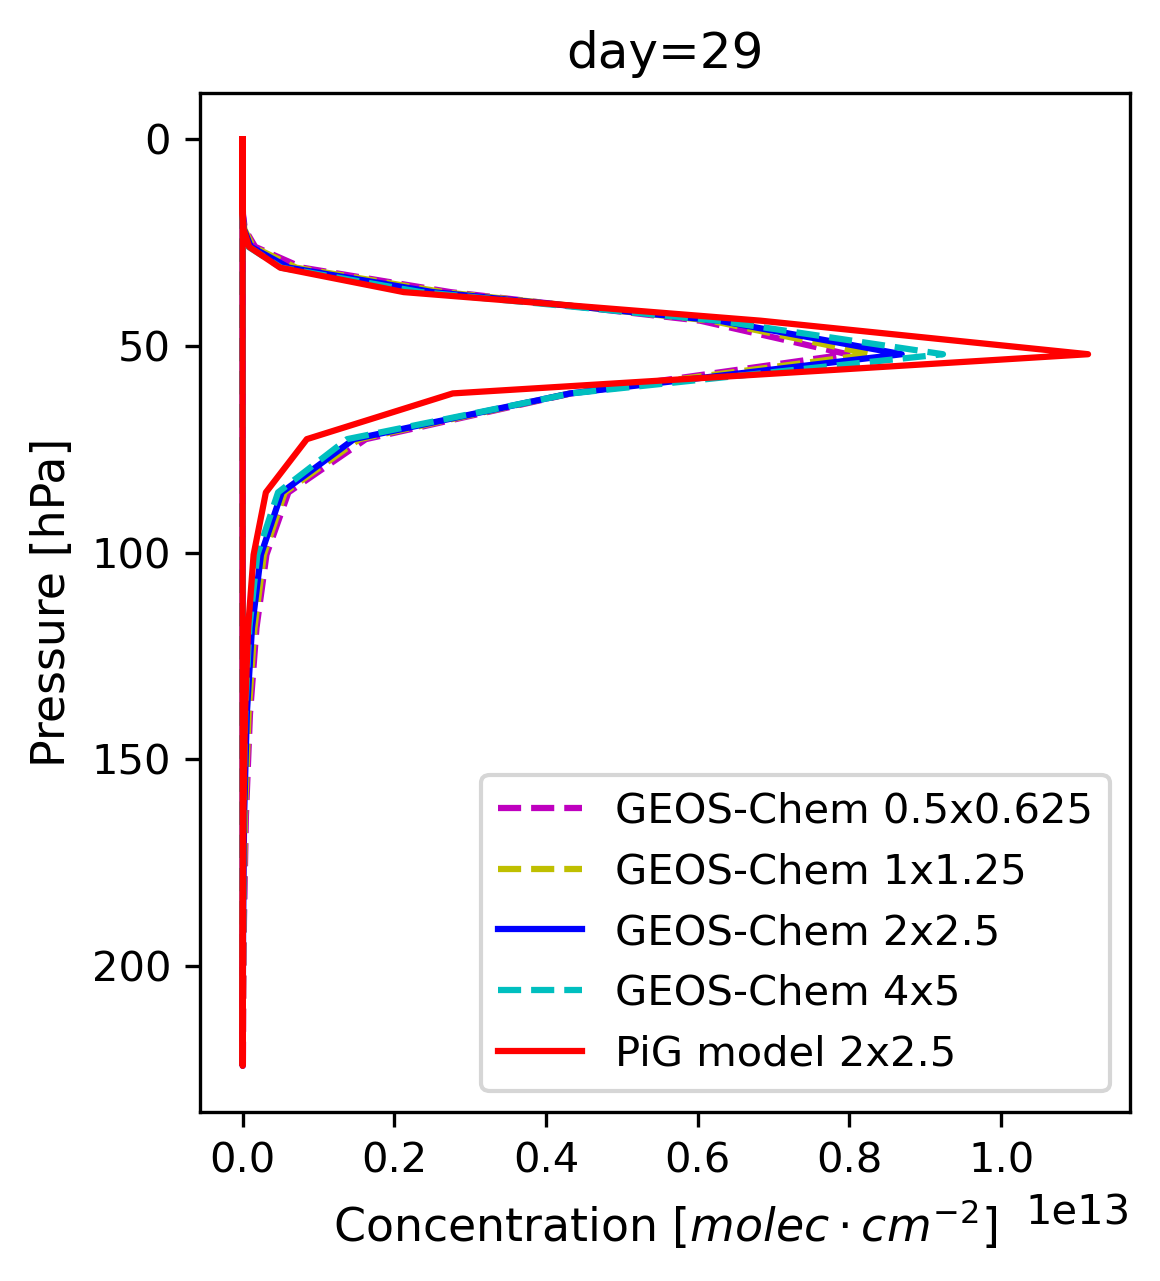

In [21]:
t = 29

# print(f'Total tracer mass [molec] in the end: ')
mass11_vertical = np.sum(EU11_molec[t,:,:,:],axis=(1,2)) /np.sum(GC_AREA0) /1e4
mass22_vertical = np.sum(EU22_molec[t,:,:,:],axis=(1,2)) /np.sum(GC_AREA1) /1e4
mass33_vertical = np.sum(EU33_molec[t,:,:,:],axis=(1,2)) /np.sum(GC_AREA2) /1e4
mass44_vertical = np.sum(EU44_molec[t,:,:,:],axis=(1,2)) /np.sum(GC_AREA3) /1e4
mass00_vertical = np.sum(LA00_molec[t,:,:,:],axis=(1,2)) /np.sum(GC_AREA4) /1e4


plt.figure(figsize=(4,4.5), dpi=300)
Y = np.arange(0,72,1)

begin = 0 # 33
end = -1 # 50

# plt.axhline(y=Ap[38], color='k', linestyle='--')

plt.plot( mass11_vertical[begin:end], lev[begin:end], 'm--', label='GEOS-Chem 0.5x0.625')
plt.plot( mass22_vertical[begin:end], lev[begin:end], 'y--', label='GEOS-Chem 1x1.25')
plt.plot( mass33_vertical[begin:end], lev[begin:end], 'b', label='GEOS-Chem 2x2.5')
plt.plot( mass44_vertical[begin:end], lev[begin:end], 'c--', label='GEOS-Chem 4x5')
plt.plot( mass00_vertical[begin:end], lev[begin:end], 'r', label='PiG model 2x2.5')

plt.gca().invert_yaxis()
# plt.yscale('log')

plt.xlabel('Concentration [$molec \cdot cm^{-2}$]', fontsize=11)
plt.ylabel('Pressure [hPa]', fontsize=11)
plt.title(f'day={t}')
plt.legend()

In [ ]:
# plt.plot(mass00_vertical[37:40])
# plt.plot(mass11_vertical[37:40])
# plt.plot(mass22_vertical[37:40])
# plt.plot(mass33_vertical[37:40])
# plt.plot(mass44_vertical[37:40])
